## Final Project - Churn Prediction Base on Early Activities

#### Su Hua

## Import Neccessary Libraries

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import cross_validation, grid_search, neighbors
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from datetime import datetime

## Pre-Define Functions

In [2]:
def make_heatmap(df):
    f, ax = plt.subplots(figsize=(11, 9))
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

## Readin Data Tables and Clean it Up

In [3]:
#Read in data from source 
df = pd.read_csv("/Users/KK/Documents/Python/GA/Final Project/Final_Project_data_v1.csv")
print df.head(10)

  portal_id                csid    close_date churn_recognized_date  \
0    454960  a0E7000000KBUxzEAH  5/15/15 0:00                   NaN   
1    533390  a0E7000000KBelnEAD  5/20/15 0:00                   NaN   
2    539692  a0E7000000KBRbSEAX  5/12/15 0:00         11/13/15 0:00   
3    522790  a0E7000000KBjreEAD  5/29/15 0:00          3/15/16 0:00   
4    538122  a0E7000000KBW8xEAH  5/18/15 0:00          5/17/16 0:00   
5    531632  a0E7000000KBfseEAD  5/22/15 0:00          6/21/16 0:00   
6    541310  a0E7000000KBjItEAL  5/28/15 0:00                   NaN   
7    536879  a0E7000000KBSIwEAP  5/13/15 0:00          6/13/16 0:00   
8    537593  a0E7000000KBkfeEAD  5/29/15 0:00                   NaN   
9    554681  a0E7000000KBkb8EAD  5/29/15 0:00                   NaN   

   churn_flag          am_owner_name  day_30_distinct_app_m  \
0           0             Alan Lynam                   14.0   
1           0             Maria Diez                    5.0   
2           1            Amel

In [4]:
# get unique values per column
f_unique = lambda df: {'num_unique': df.nunique(), 'vals_unique': df.unique()}
df.apply(f_unique).apply(pd.Series)

,num_unique,vals_unique
portal_id,2095,"[454960, 533390, 539692, 522790, 538122, 53163..."
csid,2095,"[a0E7000000KBUxzEAH, a0E7000000KBelnEAD, a0E70..."
close_date,83,"[5/15/15 0:00, 5/20/15 0:00, 5/12/15 0:00, 5/2..."
churn_recognized_date,233,"[nan, 11/13/15 0:00, 3/15/16 0:00, 5/17/16 0:0..."
churn_flag,2,"[0, 1]"
am_owner_name,143,"[Alan Lynam, Maria Diez, Amelia Hall, Varun Bh..."
day_30_distinct_app_m,26,"[14.0, 5.0, 3.0, 17.0, 21.0, 12.0, 22.0, 8.0, ..."
day_30_total_app_usage_m,1121,"[536.0, 383.0, 43.0, 1638.0, 729.0, 362.0, 138..."
day_30_users_m,25,"[3.0, 7.0, 6.0, 10.0, 5.0, 4.0, 8.0, 2.0, 14.0..."
day_60_distinct_app_m,28,"[18.0, 10.0, 8.0, 12.0, 24.0, 16.0, 13.0, 14.0..."


In [5]:
#Manipulate the Data
#Multiple customer Id, drop one of them
df.drop('portal_id', axis=1, inplace=True)

#Convert Day 0 Product list to list of dummy variables
df['ent_product_day_0_flag'] = df['day_0_product_list'].apply(lambda x: 1 if "Marketing_Enterprise" in str(x) else 0)
df['pro_product_day_0_flag'] = df['day_0_product_list'].apply(lambda x: 1 if "Marketing_Professional" in str(x) else 0)
df['add_on_product_day_0_flag'] = df['day_0_product_list'].apply(lambda x: 1 if "Marketing" not in str(x) else 0)
df.drop('day_0_product_list', axis=1, inplace=True)

#Convert Day 180 Product list to list of dummy variables
df['enterprise_product_day_180_flag'] = df['day_180_list'].apply(lambda x: 1 if "Marketing_Enterprise" in str(x) else 0)
df['pro_product__day_180_flag'] = df['day_180_list'].apply(lambda x: 1 if "Marketing_Professional" in str(x) else 0)
df['add_on_product_day_180_flag'] = df['day_180_list'].apply(lambda x: 1 if "Marketing" not in str(x) else 0)
df.drop('day_180_list', axis=1, inplace=True)


#df = pd.concat([df, pd.get_dummies(df['race'])], axis=1).drop('race', axis=1)

#Revisit the data
df.apply(f_unique).apply(pd.Series)

,num_unique,vals_unique
csid,2095,"[a0E7000000KBUxzEAH, a0E7000000KBelnEAD, a0E70..."
close_date,83,"[5/15/15 0:00, 5/20/15 0:00, 5/12/15 0:00, 5/2..."
churn_recognized_date,233,"[nan, 11/13/15 0:00, 3/15/16 0:00, 5/17/16 0:0..."
churn_flag,2,"[0, 1]"
am_owner_name,143,"[Alan Lynam, Maria Diez, Amelia Hall, Varun Bh..."
day_30_distinct_app_m,26,"[14.0, 5.0, 3.0, 17.0, 21.0, 12.0, 22.0, 8.0, ..."
day_30_total_app_usage_m,1121,"[536.0, 383.0, 43.0, 1638.0, 729.0, 362.0, 138..."
day_30_users_m,25,"[3.0, 7.0, 6.0, 10.0, 5.0, 4.0, 8.0, 2.0, 14.0..."
day_60_distinct_app_m,28,"[18.0, 10.0, 8.0, 12.0, 24.0, 16.0, 13.0, 14.0..."
day_60_total_app_usage_m,966,"[1325.0, 1553.0, 256.0, 1541.0, 537.0, 1046.0,..."


In [6]:
#Drop other uneccessary columns
df.drop('am_owner_name', axis=1, inplace=True)

#Convert Churn flag to 15 month day churn_flag
df['churn_recognized_date'] = df['churn_recognized_date'].fillna("2050/12/31")
df['days_to_churn'] = (pd.to_datetime(df['churn_recognized_date']) - pd.to_datetime(df['close_date']))/ np.timedelta64(1, 'D')
df['chrun_flag_15_month'] = df['days_to_churn'].apply(lambda x: 0 if x>= 15 * 30 else 1) 

df.drop('churn_recognized_date', axis=1, inplace=True)
df.drop('close_date', axis=1, inplace=True)
df.drop('days_to_churn', axis=1, inplace=True)
df.drop('churn_flag', axis = 1, inplace = True)

#Fill Nan as 0
df = df.fillna(0)

## Final Dataset Quick Look

In [7]:
#Revisit the data
df.apply(f_unique).apply(pd.Series)

,num_unique,vals_unique
csid,2095,"[a0E7000000KBUxzEAH, a0E7000000KBelnEAD, a0E70..."
day_30_distinct_app_m,27,"[14.0, 5.0, 3.0, 17.0, 21.0, 12.0, 22.0, 8.0, ..."
day_30_total_app_usage_m,1122,"[536.0, 383.0, 43.0, 1638.0, 729.0, 362.0, 138..."
day_30_users_m,26,"[3.0, 7.0, 6.0, 10.0, 5.0, 4.0, 8.0, 2.0, 14.0..."
day_60_distinct_app_m,29,"[18.0, 10.0, 8.0, 12.0, 24.0, 16.0, 13.0, 14.0..."
day_60_total_app_usage_m,967,"[1325.0, 1553.0, 256.0, 1541.0, 537.0, 1046.0,..."
day_60_users_m,28,"[4.0, 9.0, 3.0, 6.0, 10.0, 5.0, 2.0, 8.0, 1.0,..."
day_90_distinct_app_m,27,"[20.0, 5.0, 8.0, 12.0, 21.0, 14.0, 7.0, 22.0, ..."
day_90_total_app_usage_m,983,"[1590.0, 282.0, 172.0, 428.0, 1304.0, 2192.0, ..."
day_90_users_m,31,"[7.0, 6.0, 3.0, 10.0, 14.0, 8.0, 4.0, 32.0, 2...."


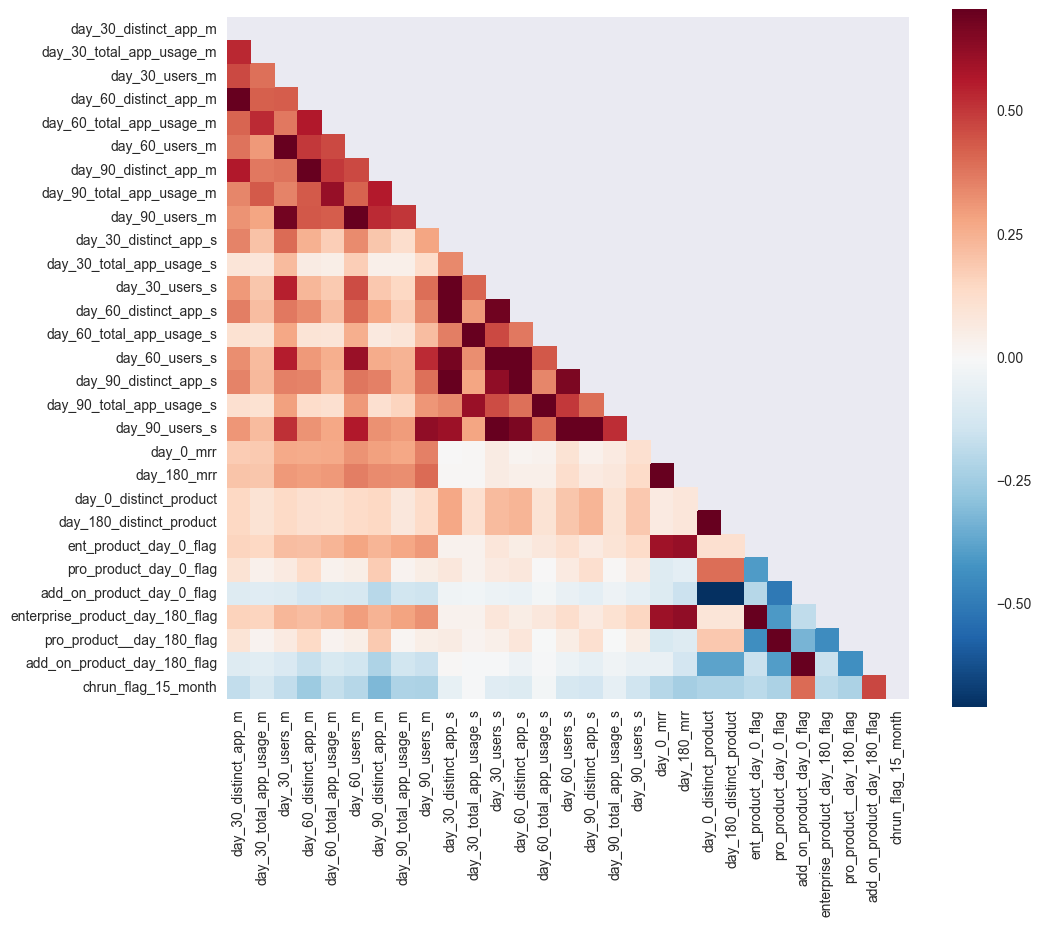

In [8]:
#Make a corr heat map between all numeric predictors
#Churn is negatively corrlated with usage data, mrr which matches the common sense
#Add on product negatived corrlated with Churn, different user experience and billing system may cause the issue
make_heatmap(df)

In [8]:
#Build the general exploratory data analysis
#App Usage has a wide range between 0 to over 10K, might need to do log transformation
#MRR also has a wide range between 0 to 10 K, might need to do log transformation as well
df.describe()

,day_30_distinct_app_m,day_30_total_app_usage_m,day_30_users_m,day_60_distinct_app_m,day_60_total_app_usage_m,day_60_users_m,day_90_distinct_app_m,day_90_total_app_usage_m,day_90_users_m,day_30_distinct_app_s,...,day_180_mrr,day_0_distinct_product,day_180_distinct_product,ent_product_day_0_flag,pro_product_day_0_flag,add_on_product_day_0_flag,enterprise_product_day_180_flag,pro_product__day_180_flag,add_on_product_day_180_flag,chrun_flag_15_month
count,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,...,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000
mean,10.385203,643.896897,4.614797,10.626730,521.339857,4.467780,10.460143,523.942243,4.649642,0.989021,...,785.588898,1.900716,1.900716,0.136516,0.502625,0.201909,0.139857,0.547971,0.133174,0.314081
std,5.600439,781.715297,3.339165,5.937437,739.795705,3.647007,6.032166,772.118495,4.162233,1.884277,...,743.831886,0.836531,0.836531,0.343417,0.500112,0.401521,0.346921,0.497812,0.339844,0.464260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,117.000000,2.000000,6.000000,73.000000,2.000000,6.000000,63.000000,2.000000,0.000000,...,280.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,407.000000,4.000000,11.000000,260.000000,4.000000,11.000000,258.000000,4.000000,0.000000,...,670.830000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,14.000000,885.500000,6.000000,15.000000,690.500000,6.000000,15.000000,678.500000,6.000000,1.000000,...,896.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,26.000000,7449.000000,28.000000,29.000000,8182.000000,31.000000,27.000000,11338.000000,43.000000,9.000000,...,9177.548800,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


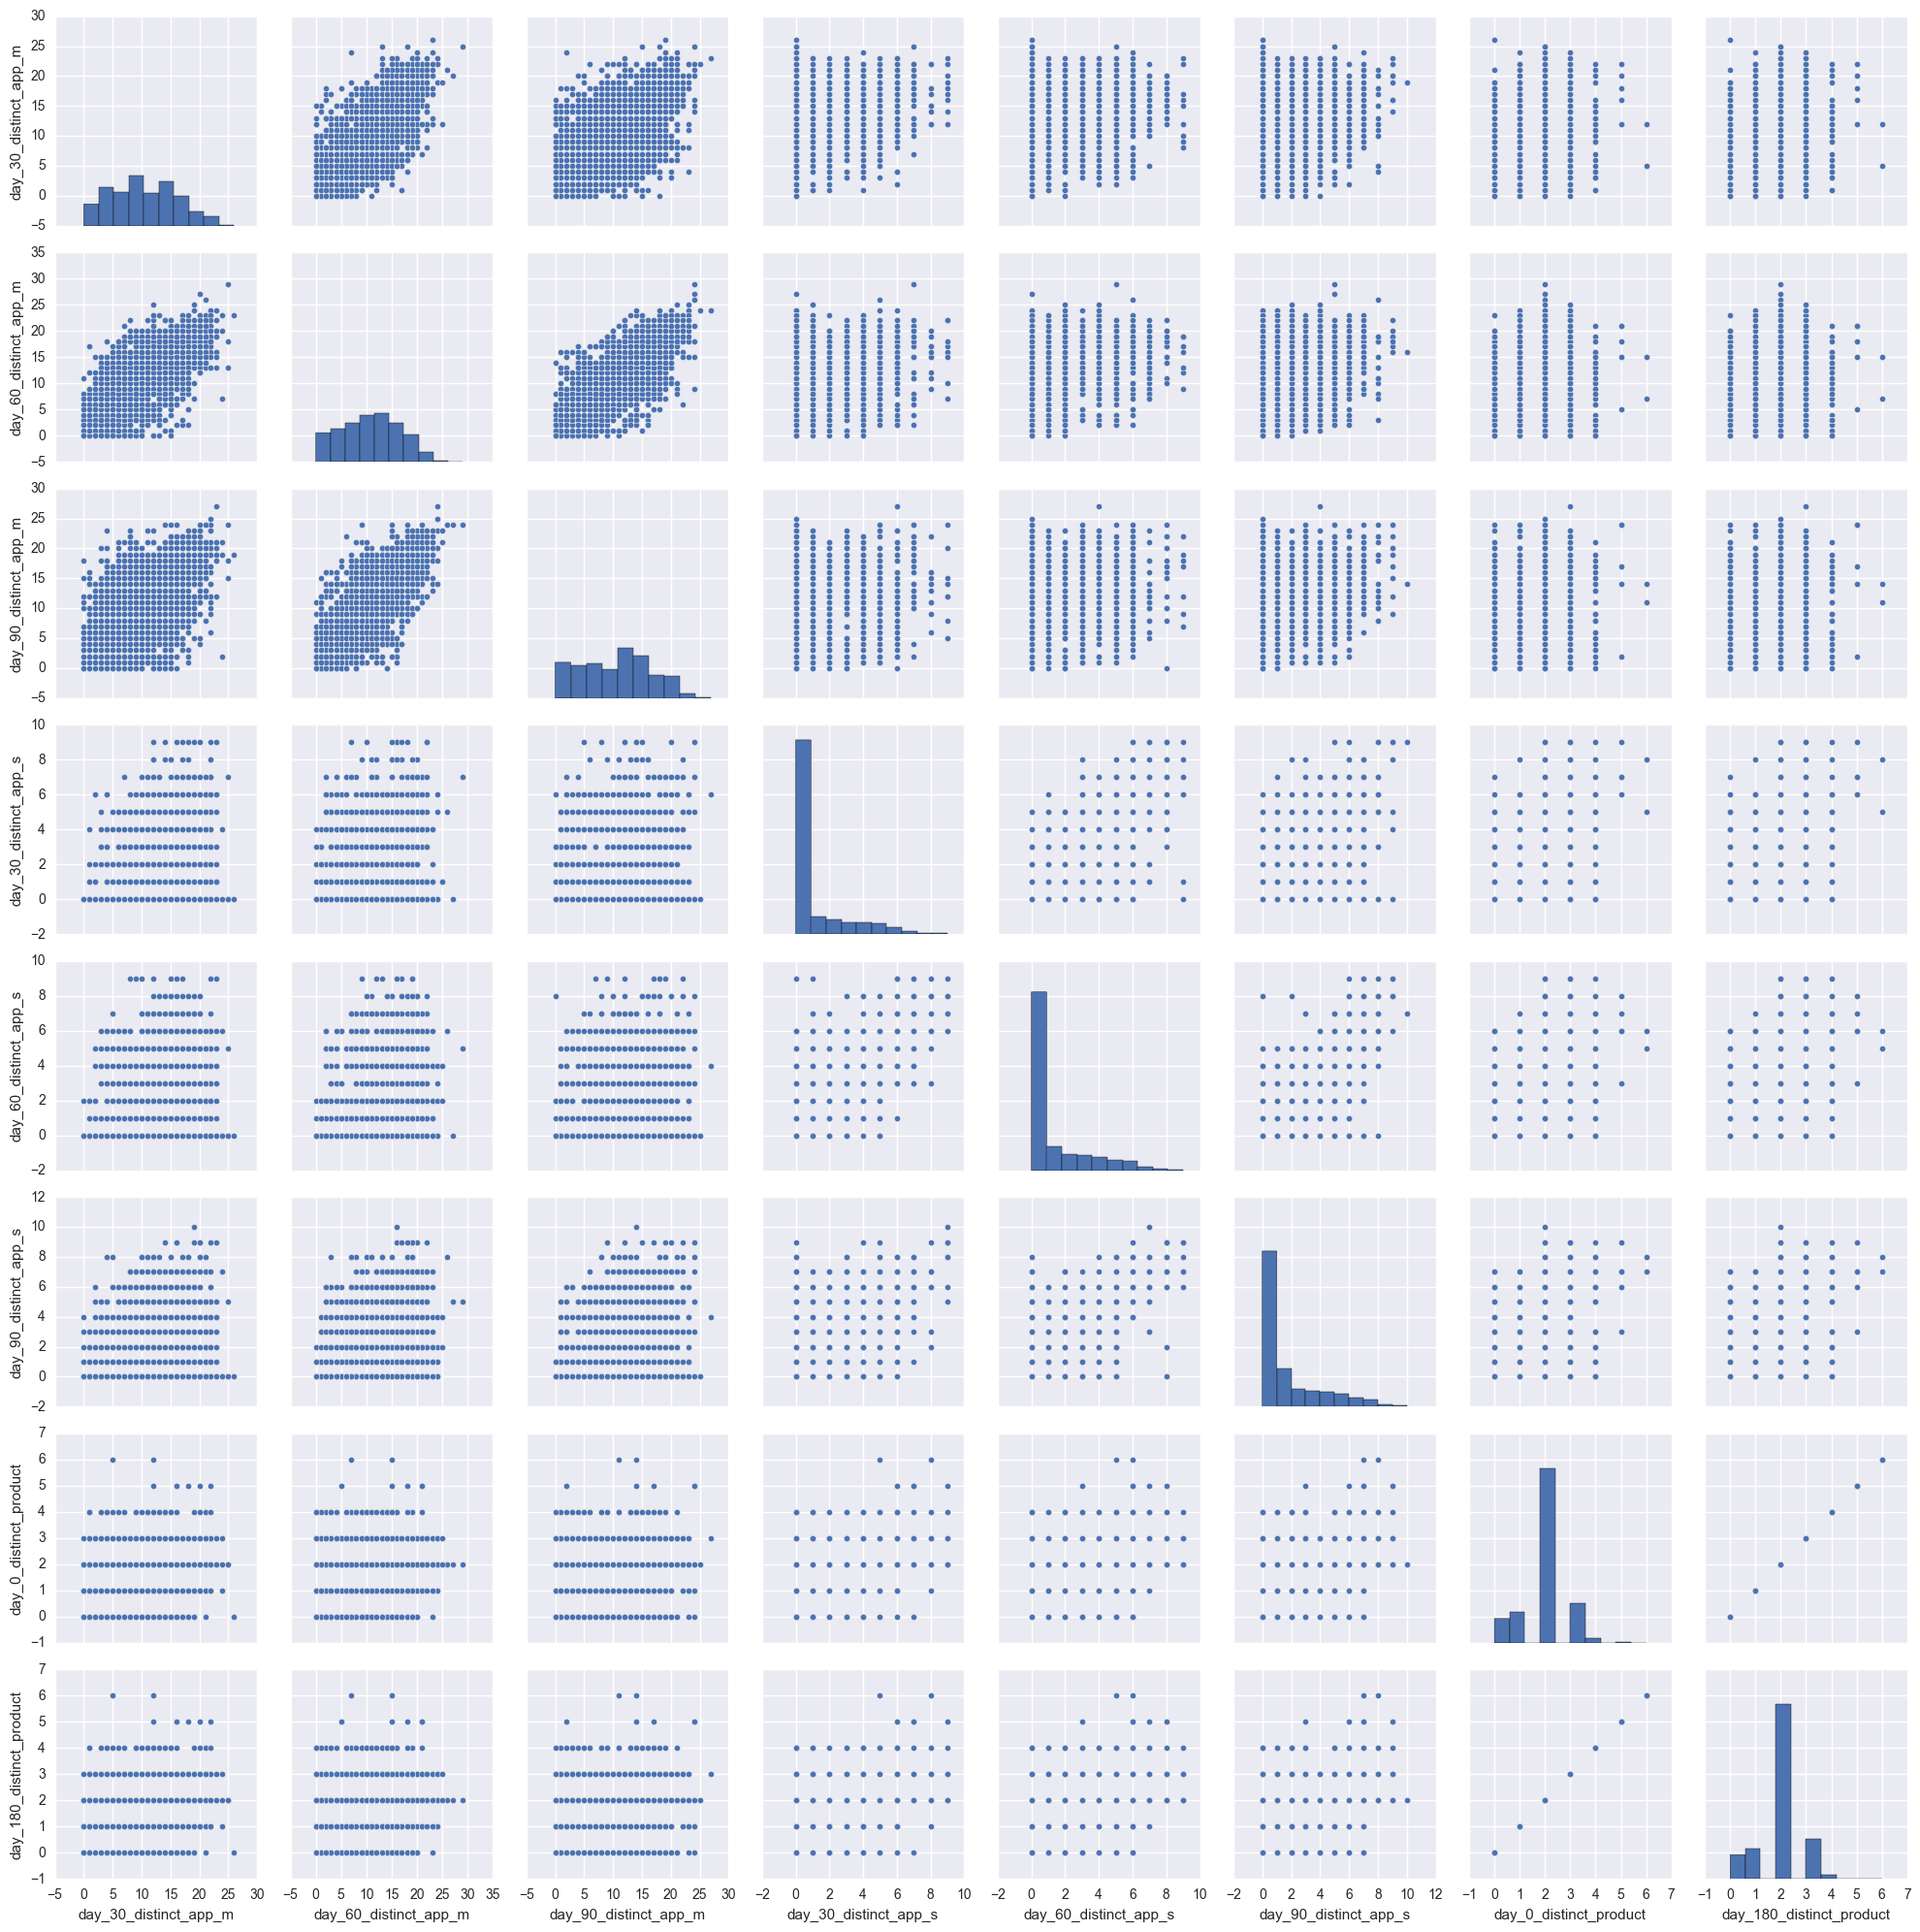

In [164]:
#Correlation Matrix for distinct app data between differenct period
#30 day, 60 day and 90 day distinct app are positivly correlated, so only need to include one of the three
col_for_corr_analysis = [col for col in df.columns if 'day_' in col and "_day_" not in col and "distinct" in col]
sns.pairplot(df[col_for_corr_analysis])
sns.plt.show()


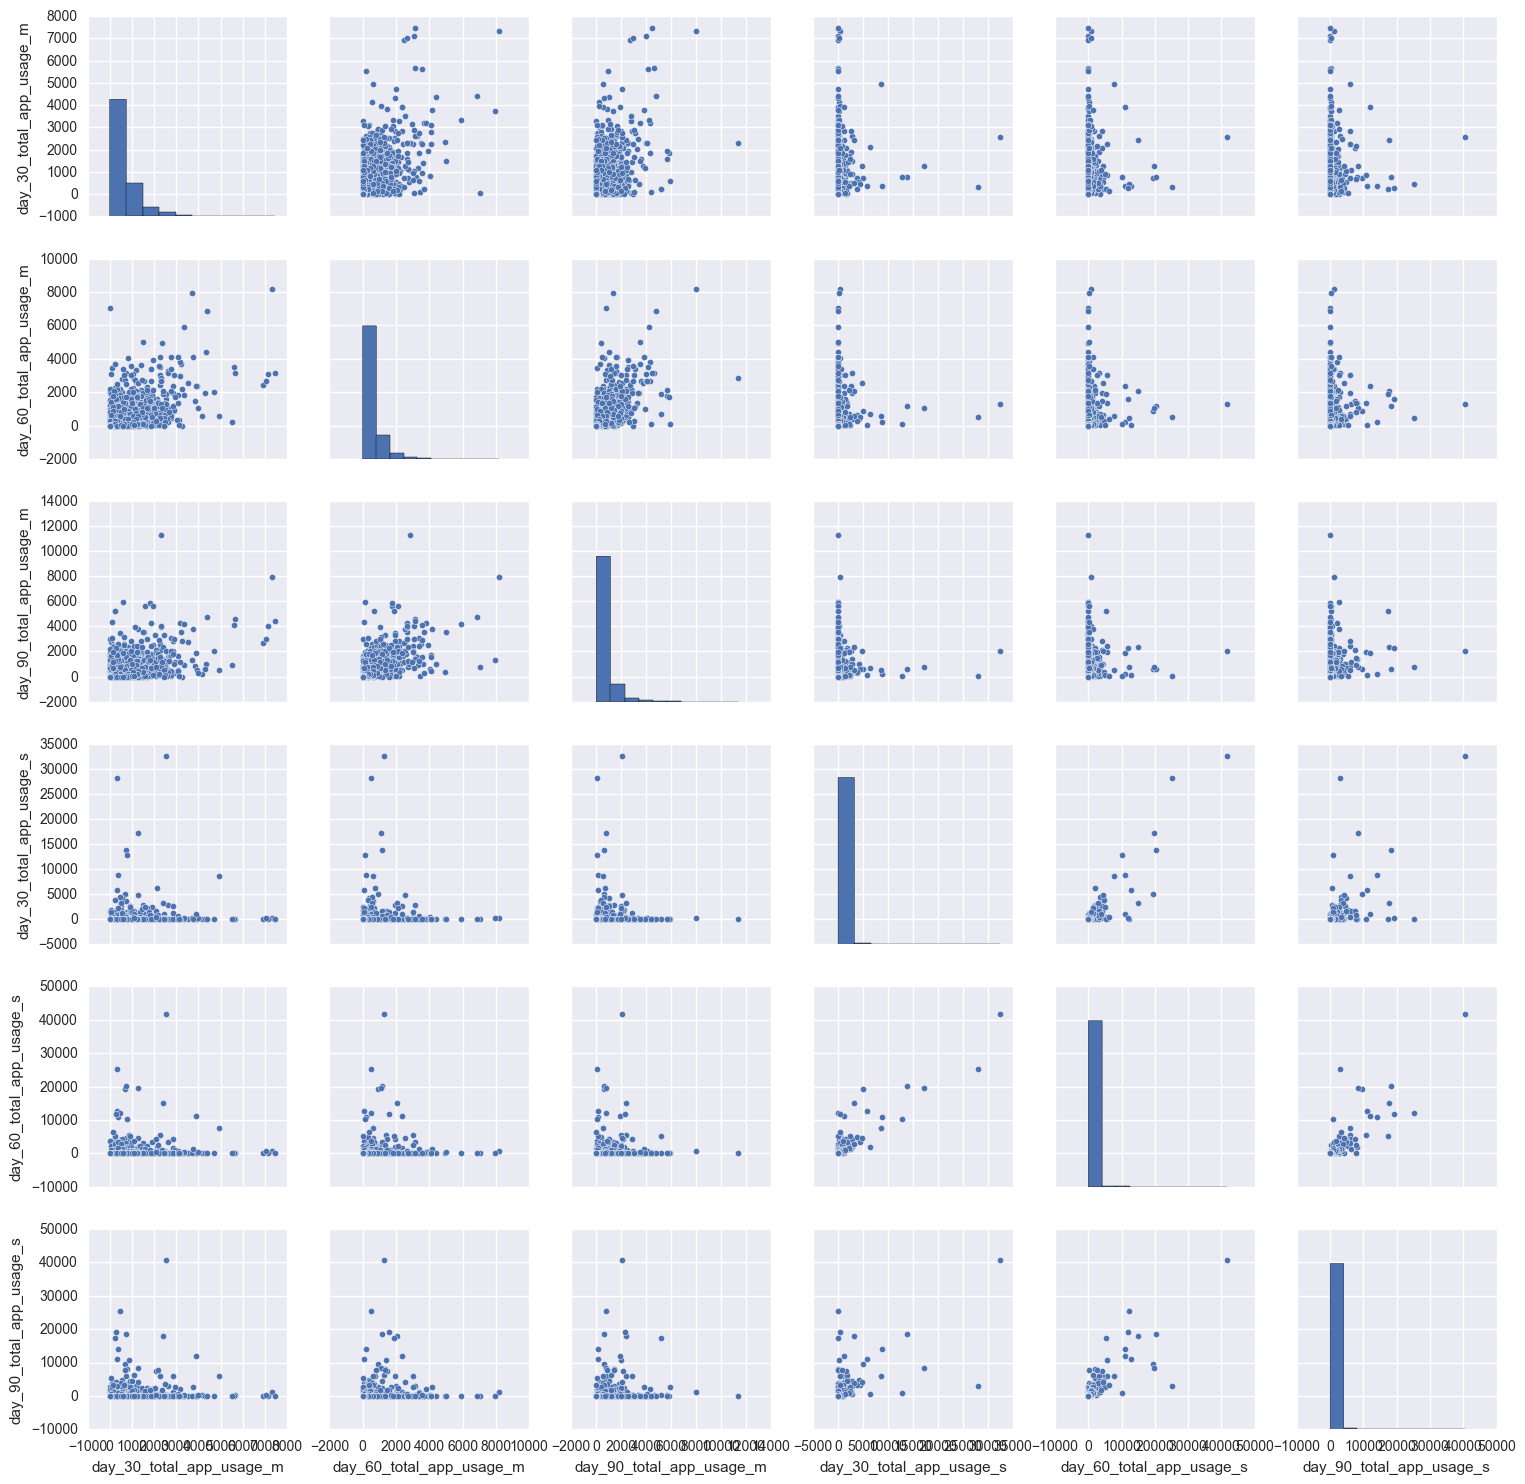

In [165]:
#Correlation Matrix for app usage data between differenct period
#Since usage has wide range, so many points are clustered in the lower left cornor
#Need to log transform the data
col_for_corr_analysis = [col for col in df.columns if 'day_' in col and "_day_" not in col and "total" in col]
sns.pairplot(df[col_for_corr_analysis])
sns.plt.show()

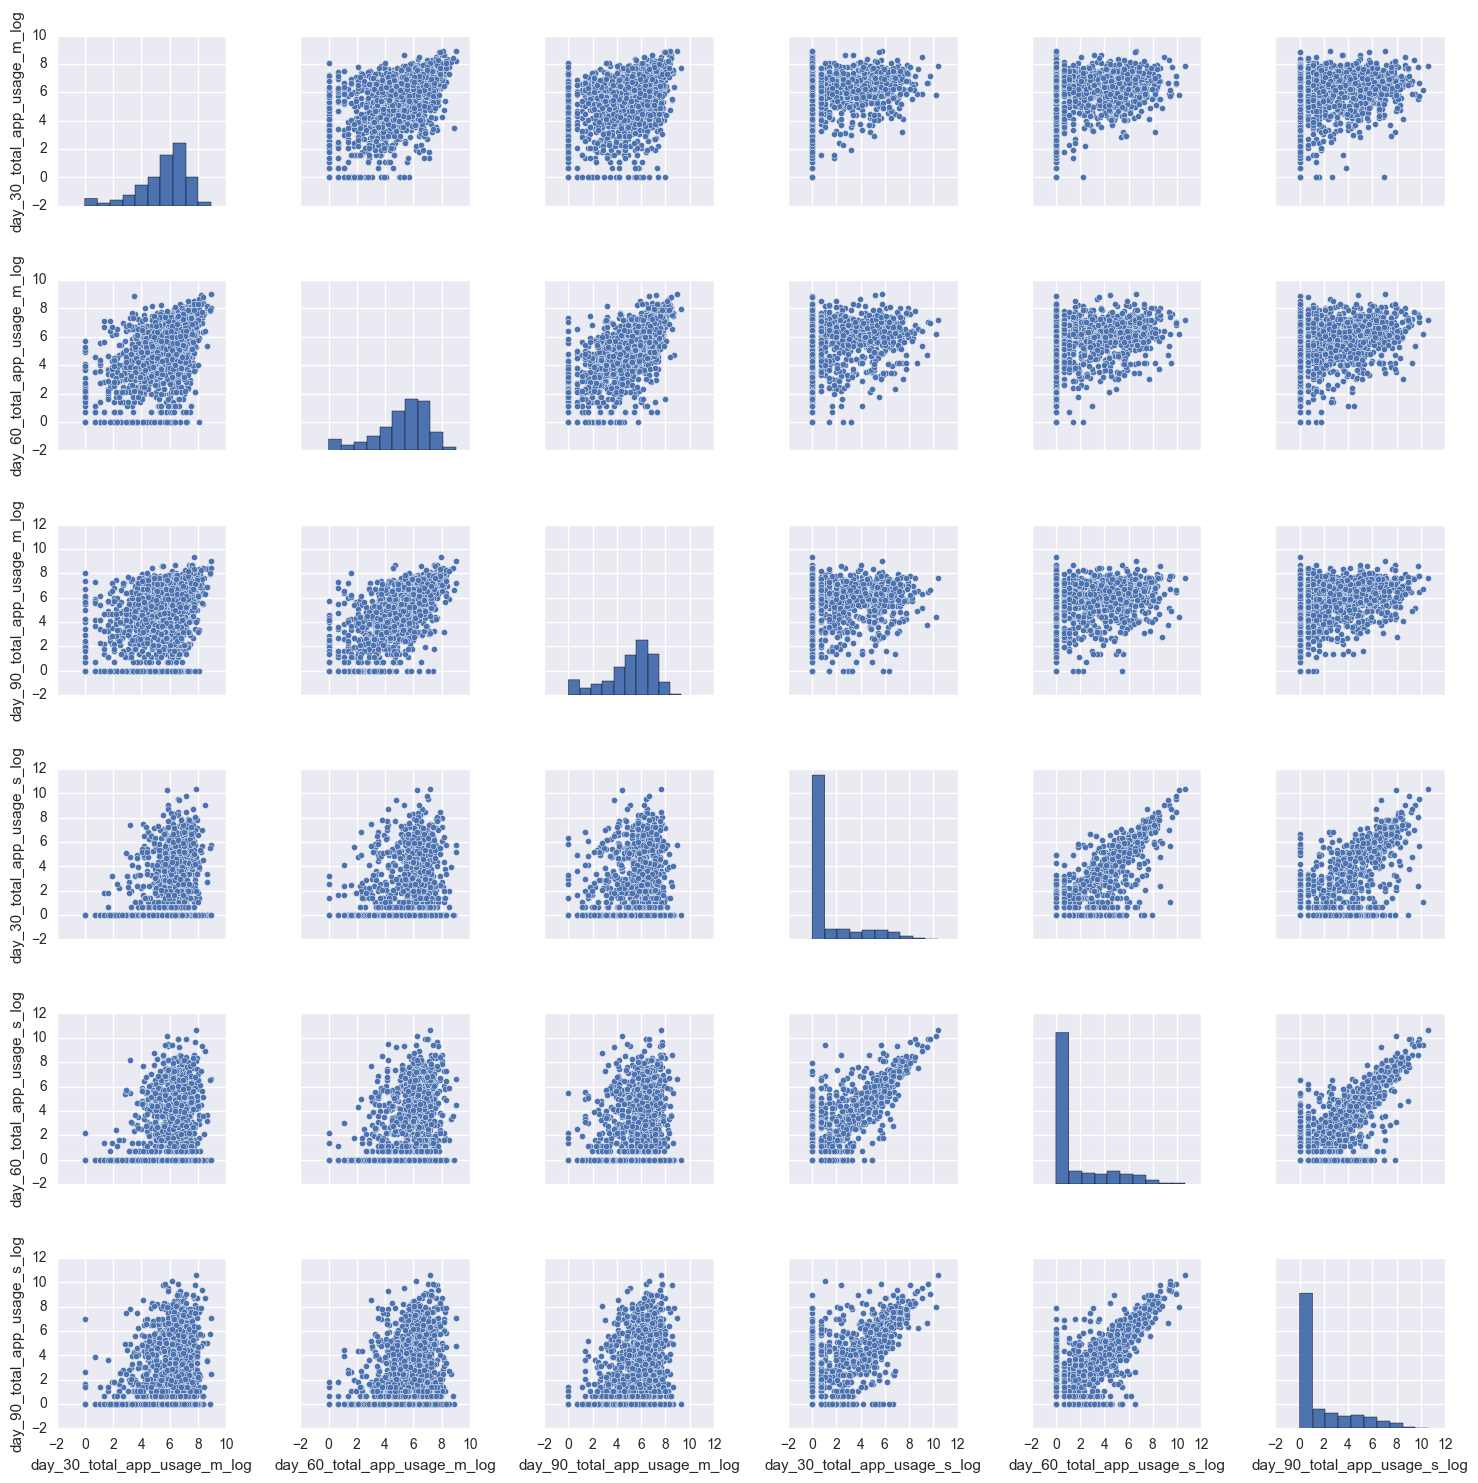

In [18]:
#Loged usage correlation matrix
col_for_corr_analysis = [col for col in df.columns if '_log' in col]
sns.pairplot(df[col_for_corr_analysis])
sns.plt.show()


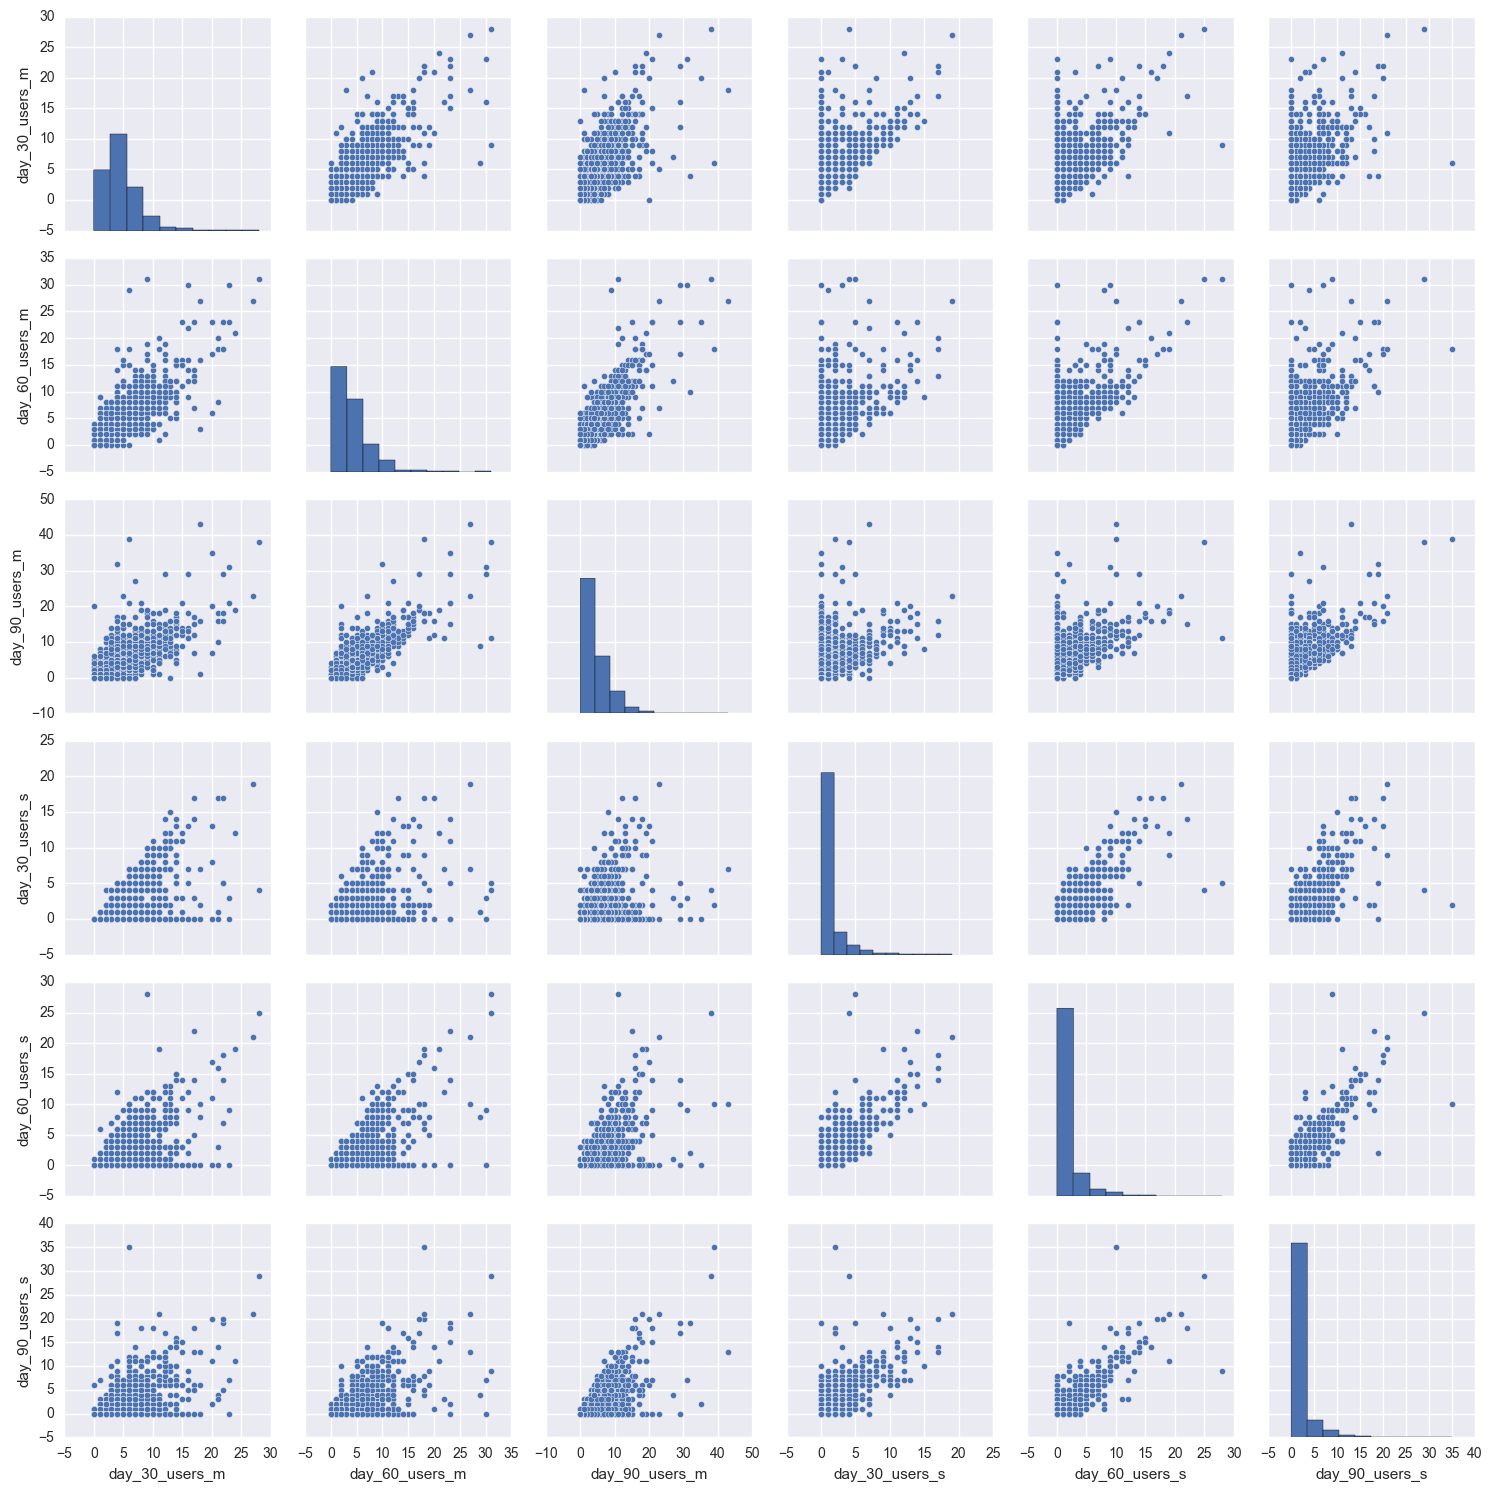

In [166]:
#Correlation Matrix for user data between differenct period
#30 day, 60 day users are positivly correlated, so only need to include one of the three
col_for_corr_analysis = [col for col in df.columns if 'day_' in col and "_day_" not in col and "users" in col]
sns.pairplot(df[col_for_corr_analysis])
sns.plt.show()

In [ ]:
#Usage has some extream values, so probably use log transfer
#Users are correlated so pick 30 day users and convert others to binary (increased amount of users of not)
#Distinct Apps are correlated so pick 30 day users and convert others to binary (increased amount of users of not)

In [9]:
#Convert Usage to log Usage
df['day_30_total_app_usage_m_log'] = np.log(df['day_30_total_app_usage_m'] + 1)
df['day_60_total_app_usage_m_log'] = np.log(df['day_60_total_app_usage_m'] + 1)
df['day_90_total_app_usage_m_log'] = np.log(df['day_90_total_app_usage_m'] + 1)

df['day_30_total_app_usage_s_log'] = np.log(df['day_30_total_app_usage_s'] + 1)
df['day_60_total_app_usage_s_log'] = np.log(df['day_60_total_app_usage_s'] + 1)
df['day_90_total_app_usage_s_log'] = np.log(df['day_90_total_app_usage_s'] + 1)


#Create Binary Variable for Usage, User and Distinct App Increase
df['day_30_90_total_app_usage_m_increase_flag'] = (df['day_90_total_app_usage_m'] - df['day_30_total_app_usage_m']).apply(lambda x: 1 if x > 0 else 0)
df['day_30_90_users_m_increase_flag'] = (df['day_90_users_m'] - df['day_30_users_m']).apply(lambda x: 1 if x > 0 else 0)
df['day_30_90_distinct_app_m_increase_flag'] = (df['day_90_distinct_app_m'] - df['day_30_distinct_app_m']).apply(lambda x: 1 if x > 0 else 0)

df['day_30_90_total_app_usage_s_increase_flag'] = (df['day_90_total_app_usage_s'] - df['day_30_total_app_usage_s']).apply(lambda x: 1 if x > 0 else 0)
df['day_30_90_users_s_increase_flag'] = (df['day_90_users_s'] - df['day_30_users_s']).apply(lambda x: 1 if x > 0 else 0)
df['day_30_90_distinct_app_s_increase_flag'] = (df['day_90_distinct_app_s'] - df['day_30_distinct_app_s']).apply(lambda x: 1 if x > 0 else 0)


In [10]:
#Quick Summarize for the new "increase" flag
#39% of customer increase their usage between 30 days and 90 day period
df[['day_30_90_total_app_usage_m_increase_flag','day_30_90_users_m_increase_flag', 'day_30_90_distinct_app_m_increase_flag']].describe()

,day_30_90_total_app_usage_m_increase_flag,day_30_90_users_m_increase_flag,day_30_90_distinct_app_m_increase_flag
count,2095.000000,2095.000000,2095.000000
mean,0.388544,0.334606,0.445823
std,0.487536,0.471965,0.497175
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


## Create Logistic Regression

In [11]:
#Creade Dataset for prediction analysis
#Only use 30 day and 90 day usage data, and binary data for 30 to 90 days
#Also add intercept 
col_to_keep = ['chrun_flag_15_month',
 'day_30_distinct_app_m',
 'day_30_users_m',
 'day_30_total_app_usage_m_log',
 
 'day_90_distinct_app_m',
 'day_90_users_m',
 'day_90_total_app_usage_m_log',

 'day_30_distinct_app_s',
 'day_30_users_s',
 'day_30_total_app_usage_s_log',
 
 'day_90_distinct_app_s',
 'day_90_users_s',
 'day_90_total_app_usage_s_log',

 'day_30_90_distinct_app_m_increase_flag',
 'day_30_90_users_m_increase_flag',
 'day_30_90_total_app_usage_m_increase_flag',
 
 'day_30_90_distinct_app_s_increase_flag',
 'day_30_90_users_s_increase_flag',
 'day_30_90_total_app_usage_s_increase_flag',
 
 'day_0_mrr',
 'day_180_mrr',
 'day_0_distinct_product',
 'day_180_distinct_product',
 'ent_product_day_0_flag',
 'pro_product_day_0_flag',
 'add_on_product_day_0_flag',
 'enterprise_product_day_180_flag',
 'pro_product__day_180_flag',
 'add_on_product_day_180_flag']

df_model_ready = df[col_to_keep]
df_model_ready['intercept'] = 1
df_model_ready.head(10)

/Users/KK/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,chrun_flag_15_month,day_30_distinct_app_m,day_30_users_m,day_30_total_app_usage_m_log,day_90_distinct_app_m,day_90_users_m,day_90_total_app_usage_m_log,day_30_distinct_app_s,day_30_users_s,day_30_total_app_usage_s_log,...,day_180_mrr,day_0_distinct_product,day_180_distinct_product,ent_product_day_0_flag,pro_product_day_0_flag,add_on_product_day_0_flag,enterprise_product_day_180_flag,pro_product__day_180_flag,add_on_product_day_180_flag,intercept
0,0,14.0,3.0,6.285998,20.0,7.0,7.372118,0.0,0.0,0.000000,...,2786.7840,1.0,1.0,1,0,0,1,0,0,1
1,0,5.0,7.0,5.950643,5.0,6.0,5.645447,0.0,0.0,0.000000,...,200.0000,2.0,2.0,0,0,0,0,0,0,1
2,1,3.0,3.0,3.784190,8.0,3.0,5.153292,0.0,0.0,0.000000,...,333.0300,1.0,1.0,0,0,1,0,0,1,1
3,1,17.0,6.0,7.401842,12.0,6.0,6.061457,0.0,0.0,0.000000,...,812.0162,2.0,2.0,0,0,1,0,0,1,1
4,1,21.0,10.0,6.593045,21.0,10.0,7.173958,6.0,7.0,6.570883,...,640.0000,3.0,3.0,0,0,1,0,0,1,1
5,1,12.0,5.0,5.894403,14.0,14.0,7.693026,0.0,0.0,0.000000,...,1145.8333,2.0,2.0,0,1,0,0,1,0,1
6,0,22.0,10.0,7.237059,20.0,8.0,7.190676,0.0,0.0,0.000000,...,4478.7145,2.0,2.0,1,0,0,1,0,0,1
7,1,12.0,4.0,5.598422,12.0,7.0,6.028279,0.0,0.0,0.000000,...,170.6624,2.0,2.0,0,0,0,0,0,0,1
8,0,14.0,8.0,6.304449,14.0,3.0,6.263398,3.0,2.0,3.258097,...,1300.0000,3.0,3.0,0,1,0,0,1,0,1
9,0,12.0,4.0,5.940171,7.0,4.0,5.298317,1.0,2.0,1.791759,...,800.0000,2.0,2.0,0,1,0,0,1,0,1


In [12]:
#Create Train Dataset and Test Dataset
x_train, x_test, y_train, y_test = train_test_split(df_model_ready.ix[:,1:], df_model_ready.ix[:,0], test_size=0.2, random_state=42)

In [13]:
# fit the model
logit = sm.Logit(y_train, x_train)
stats_model_result = logit.fit()

print stats_model_result.summary()

         Current function value: 0.465978
         Iterations: 35
                            Logit Regression Results                           
Dep. Variable:     chrun_flag_15_month   No. Observations:                 1676
Model:                           Logit   Df Residuals:                     1648
Method:                            MLE   Df Model:                           27
Date:                 Sat, 28 Jan 2017   Pseudo R-squ.:                  0.2435
Time:                         15:01:43   Log-Likelihood:                -780.98
converged:                       False   LL-Null:                       -1032.3
                                         LLR p-value:                 4.396e-89
                                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------
day_30_distinct_app_m                         0.0003      0.024      0.011

/Users/KK/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [14]:
#Check the prediction result and calculate the accuracy of the model
y_test_df = pd.DataFrame(y_test)
y_test_df['churn_pred'] = stats_model_result.predict(x_test)
y_test_df['churn_pred_flag'] = y_test_df['churn_pred'].apply(lambda x: 1 if x>0.5 else 0)
y_test_df.head()

,chrun_flag_15_month,churn_pred,churn_pred_flag
210,0,0.156201,0
1169,0,0.260057,0
1146,0,0.042571,0
879,0,0.047372,0
29,0,0.143342,0


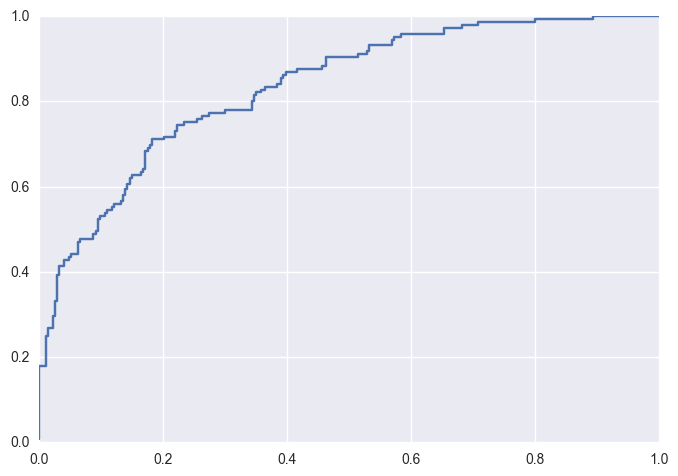

In [15]:
#Roc curve
actuals = y_test_df['chrun_flag_15_month']
probas = y_test_df['churn_pred']
#plt.plot(roc_curve(actuals, probas)[0], roc_curve(actuals,probas)[1])
fp_full_model, tp_full_model, _ = roc_curve(actuals, probas)
plt.plot(fp_full_model, tp_full_model, label='Full Predictor Model')

In [15]:
logit_accuracy_metric = pd.crosstab(index= y_test_df['chrun_flag_15_month'], 
                          columns=y_test_df['churn_pred_flag'])
logit_accuracy_metric

churn_pred_flag,0,1
chrun_flag_15_month,,
0,263,11
1,84,61


In [16]:
(263 + 61) * 1.0/ (263 + 11 + 84 + 61)

0.7732696897374701

## Stepwise Backward Elimination 
#### Eliminate the high P-Value Score Predictors

In [16]:
#temp1 = pd.DataFrame(stats_model_result.pvalues)
#temp1.columns.tolist()
#temp1['xx'] = temp1[0] <= 0.05
#temp1.loc[(temp1.xx == True)]

refine_column_to_keep = [
'chrun_flag_15_month',
'day_90_total_app_usage_m_log',
'day_30_90_total_app_usage_s_increase_flag',
'ent_product_day_0_flag',
'enterprise_product_day_180_flag',
'add_on_product_day_180_flag']


In [17]:
df_refine_model_ready = df[refine_column_to_keep]
df_refine_model_ready['intercept'] = 1
#Create Train Dataset and Test Dataset
x_train, x_test, y_train, y_test = train_test_split(df_refine_model_ready.ix[:,1:], df_refine_model_ready.ix[:,0], test_size=0.2, random_state=13)

/Users/KK/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
# fit the model
logit_refined = sm.Logit(y_train, x_train)
stats_model_result_refined = logit_refined.fit()

print stats_model_result_refined.summary()

         Current function value: 0.484000
         Iterations: 35
                            Logit Regression Results                           
Dep. Variable:     chrun_flag_15_month   No. Observations:                 1676
Model:                           Logit   Df Residuals:                     1670
Method:                            MLE   Df Model:                            5
Date:                 Sat, 28 Jan 2017   Pseudo R-squ.:                  0.2321
Time:                         15:02:01   Log-Likelihood:                -811.18
converged:                       False   LL-Null:                       -1056.3
                                         LLR p-value:                9.839e-104
                                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------
day_90_total_app_usage_m_log                 -0.2919      0.034     -8.610

/Users/KK/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:
#Check the prediction result and calculate the accuracy of the model
y_test_df = pd.DataFrame(y_test)
y_test_df['churn_pred'] = stats_model_result_refined.predict(x_test)
y_test_df['churn_pred_flag'] = y_test_df['churn_pred'].apply(lambda x: 1 if x>0.5 else 0)
y_test_df.head()

,chrun_flag_15_month,churn_pred,churn_pred_flag
1562,0,0.127433,0
321,0,0.182375,0
1175,1,0.916264,1
292,0,0.167675,0
413,0,0.199947,0


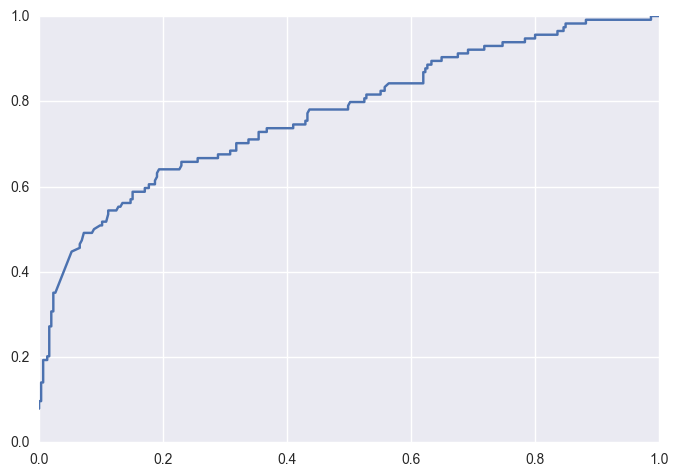

In [20]:
#Roc curve
actuals = y_test_df['chrun_flag_15_month']
probas = y_test_df['churn_pred']
#plt.plot(roc_curve(actuals, probas)[0], roc_curve(actuals,probas)[1])

fp_refine_model, tp_refine_model, _ = roc_curve(actuals, probas)
plt.plot(fp_refine_model, tp_refine_model, label='Refine Predictor Model')

In [22]:
logit_refine_accuracy_metric = pd.crosstab(index= y_test_df['chrun_flag_15_month'], 
                          columns=y_test_df['churn_pred_flag'])
logit_refine_accuracy_metric

churn_pred_flag,0,1
chrun_flag_15_month,,
0,284,21
1,60,54


In [23]:
(284 + 54) * 1.0 / (284 + 21 + 60 + 54)

0.8066825775656324

In [22]:
#New set of predictors base on random forest most important features
refine_column_2_to_keep = [
'chrun_flag_15_month',
'day_0_mrr',
'day_180_mrr',
'day_30_distinct_app_m',
'day_30_users_m',
'day_30_total_app_usage_m_log',
'day_90_distinct_app_m',
'day_90_users_m',
'day_90_total_app_usage_m_log',
'add_on_product_day_0_flag',
'add_on_product_day_180_flag']

df_refine_model_2_ready = df[refine_column_2_to_keep]
df_refine_model_2_ready['intercept'] = 1
#Create Train Dataset and Test Dataset
x_train, x_test, y_train, y_test = train_test_split(df_refine_model_2_ready.ix[:,1:], df_refine_model_2_ready.ix[:,0], test_size=0.2, random_state=25)

# fit the model
logit_refined_2 = sm.Logit(y_train, x_train)
stats_model_result_refined_2 = logit_refined_2.fit()

print stats_model_result_refined_2.summary()

Optimization terminated successfully.
         Current function value: 0.488092
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     chrun_flag_15_month   No. Observations:                 1676
Model:                           Logit   Df Residuals:                     1665
Method:                            MLE   Df Model:                           10
Date:                 Sat, 28 Jan 2017   Pseudo R-squ.:                  0.2303
Time:                         15:02:49   Log-Likelihood:                -818.04
converged:                        True   LL-Null:                       -1062.8
                                         LLR p-value:                 7.476e-99
                                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
day_0_mrr                       -0.0002      0.000     -0.586   

/Users/KK/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
#Check the prediction result and calculate the accuracy of the model
y_test_df = pd.DataFrame(y_test)
y_test_df['churn_pred'] = stats_model_result_refined_2.predict(x_test)
y_test_df['churn_pred_flag'] = y_test_df['churn_pred'].apply(lambda x: 1 if x>0.5 else 0)
y_test_df.head()

,chrun_flag_15_month,churn_pred,churn_pred_flag
858,1,0.850024,1
1364,0,0.949769,1
1382,1,0.414374,0
1189,0,0.192355,0
863,1,0.852686,1


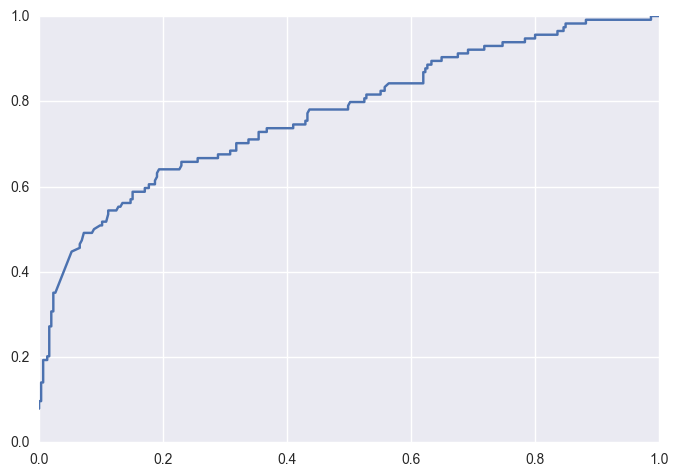

In [24]:
#Roc curve
actuals = y_test_df['chrun_flag_15_month']
probas = y_test_df['churn_pred']
#plt.plot(roc_curve(actuals, probas)[0], roc_curve(actuals,probas)[1])

fp_refine_model_2, tp_refine_model_2, _ = roc_curve(actuals, probas)
plt.plot(fp_refine_model, tp_refine_model, label='Refine Predictor Model')

In [27]:
logit_refine_2_accuracy_metric = pd.crosstab(index= y_test_df['chrun_flag_15_month'], 
                          columns=y_test_df['churn_pred_flag'])
logit_refine_2_accuracy_metric

churn_pred_flag,0,1
chrun_flag_15_month,,
0,301,13
1,57,48


In [28]:
(301 + 48) * 1.0 / (301 + 13 + 57 + 48)

0.8329355608591885

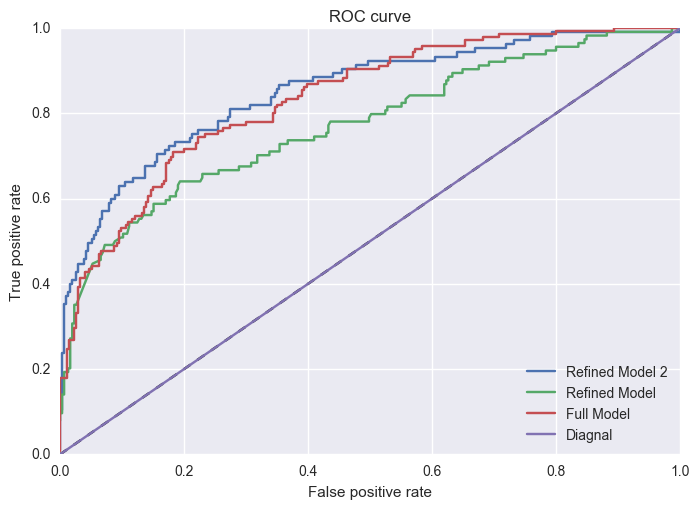

In [29]:
#Combine Multiple ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fp_refine_model_2, tp_refine_model_2, label='Refined Model 2')
plt.plot(fp_refine_model, tp_refine_model, label='Refined Model')
plt.plot(fp_full_model, tp_full_model, label='Full Model')
plt.plot(fp_full_model, fp_full_model, label='Diagnal')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#Seem like the predictor from random forest give me better true positive prediction but worse false positive
#Full predictors gives better false positive but worse true positive
#Lower P value predictor generally give bad prediction


## K-Fold Cross Validation for Logistic Regression

In [32]:
#K fold on columns are determined by random forest model
k_fold_column_to_keep = [
'day_0_mrr',
'day_180_mrr',
'day_30_distinct_app_m',
'day_30_users_m',
'day_30_total_app_usage_m_log',
'day_90_distinct_app_m',
'day_90_users_m',
'day_90_total_app_usage_m_log',
'add_on_product_day_0_flag',
'add_on_product_day_180_flag',
'intercept']
xx = df_model_ready.ix[:, 1:][k_fold_column_to_keep]
yy = df_model_ready.ix[:, 0]

kf = cross_validation.KFold(len(df_model_ready), n_folds=5, shuffle=True)
scores = []
best_score = None
coefficient = []

for train_index, test_index in kf:
    logit_model_3 = LogisticRegression()
    logit_model_3.fit(xx.iloc[train_index], yy.iloc[train_index])
    myscore = logit_model_3.score(xx.iloc[test_index], yy.iloc[test_index])
    scores.append(logit_model_3.score(xx.iloc[test_index], yy.iloc[test_index]))
    coefficient.append(logit_model_3.coef_)
    coefficient.append("|")
    
    #find the lowest mse model
    if not best_score:
        best_score =  myscore
        best_model = logit_model_3
    else:
        if myscore > best_score:
            best_score = myscore
            best_model = logit_model_3

print 'scores: %s' %scores
#print 'Coefficients:', coefficient
print 'Avg. Scores: %s' %(sum(scores)* 1.0/ len(scores))
 
print '\n'
#print "Predictor: " , x.columns.tolist()
print 'Best Score %s' %best_score
print 'Best Model Coefficient:', best_model.coef_

scores: [0.77565632458233891, 0.74701670644391405, 0.79236276849642007, 0.80429594272076377, 0.80668257756563244]
Avg. Scores: 0.785202863962


Best Score 0.806682577566
Best Model Coefficient: [[ -4.04762167e-04  -4.55299946e-04  -1.19317836e-02  -1.42492011e-02
    2.37231844e-02  -2.19449847e-02  -6.41262769e-03  -1.68900218e-01
    4.85961395e-01   2.19159415e+00   2.70612026e-01]]


In [31]:
#K fold on full predictor model
x = df_model_ready.ix[:, 1:]
y = df_model_ready.ix[:, 0]

kf = cross_validation.KFold(len(df_model_ready), n_folds=5, shuffle=True)
scores = []
best_score = None
coefficient = []

for train_index, test_index in kf:
    logit_full_model = LogisticRegression()
    logit_full_model.fit(x.iloc[train_index], y.iloc[train_index])
    myscore = logit_full_model.score(x.iloc[test_index], y.iloc[test_index])
    scores.append(logit_full_model.score(x.iloc[test_index], y.iloc[test_index]))
    coefficient.append(logit_full_model.coef_)
    coefficient.append("|")
    
    #find the lowest mse model
    if not best_score:
        best_score =  myscore
        best_model = logit_full_model
    else:
        if myscore > best_score:
            best_score = myscore
            best_model = logit_full_model

print 'scores: %s' %scores
#print 'Coefficients:', coefficient
print 'Avg. Scores: %s' %(sum(scores)* 1.0/ len(scores))
 
print '\n'
#print "Predictor: " , x.columns.tolist()
print 'Best Score %s' %best_score
print 'Best Model Coefficient:', best_model.coef_

scores: [0.78042959427207637, 0.81622911694510736, 0.75417661097852029, 0.80668257756563244, 0.76372315035799521]
Avg. Scores: 0.784248210024


Best Score 0.816229116945
Best Model Coefficient: [[  7.19853591e-03  -2.93772963e-02  -6.75901403e-02  -4.09471513e-02
    5.56754360e-02  -7.39308063e-02   7.05358456e-02  -7.83570698e-02
    3.38061799e-02   2.12528542e-04  -6.32426881e-02  -5.96985865e-02
    1.48880829e-01   5.68143271e-02  -4.33750472e-01  -1.67297319e-01
   -8.08111219e-02   3.46627739e-01   3.66071946e-05  -5.95805170e-04
    7.65949891e-02   7.65949891e-02  -2.62310813e-01   7.22006238e-02
    9.44480708e-01  -3.14013360e-01  -3.15041249e-01   1.84529821e+00
    1.05889034e-01]]


In [33]:
#Nicer way to look at best score logit model (columns from random forest)
logit_variable_column = xx.columns.tolist()
logit_coeffecient = pd.DataFrame(best_model.coef_)
logit_coeffecient.columns = logit_variable_column
logit_coeffecient

,day_0_mrr,day_180_mrr,day_30_distinct_app_m,day_30_users_m,day_30_total_app_usage_m_log,day_90_distinct_app_m,day_90_users_m,day_90_total_app_usage_m_log,add_on_product_day_0_flag,add_on_product_day_180_flag,intercept
0,-0.000405,-0.000455,-0.011932,-0.014249,0.023723,-0.021945,-0.006413,-0.1689,0.485961,2.191594,0.270612


In [ ]:
#Predictors come from random forest generate better result

## K - Neartest Neighbors
## Cross Validation with Grid Search CV to find the best K value

In [34]:
k = range(2, 50)
params = {'n_neighbors': k }
kf = cross_validation.KFold(len(df_model_ready), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(x, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=2095, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

{'n_neighbors': 26}
0.73937947494
{'n_neighbors': 26}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=26, p=2,
           weights='uniform')


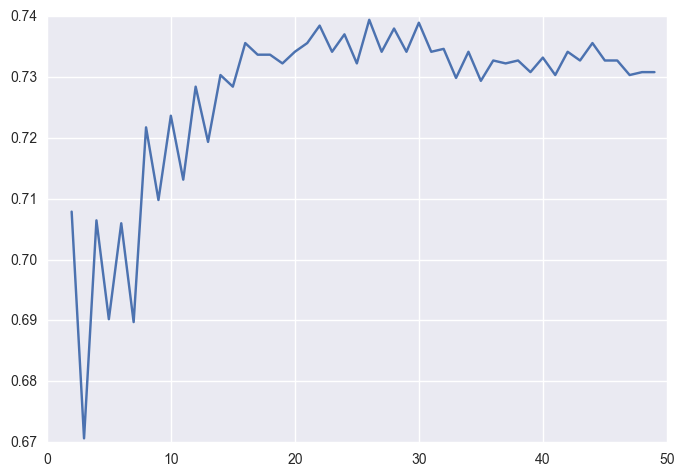

In [35]:
print gs.best_params_
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

plt.plot(k,[s[1] for s in  gs.grid_scores_],)

In [362]:
# 5-fold cross-validation with K=26 for KNN
#knn = KNeighborsClassifier(n_neighbors=26, leaf_size=20)
#scores = cross_val_score(knn, x, y, cv=10, scoring='roc_auc')
#print (scores.mean())

0.6883613966


In [36]:
#n_neighbors = 26 base on grid search cv
kf = cross_validation.KFold(len(df_model_ready), n_folds=5, shuffle=True)
scores = []
best_score = None

for train_index, test_index in kf:
    knn = KNeighborsClassifier(n_neighbors=26, leaf_size=20)
    knn.fit(x.iloc[train_index], y.iloc[train_index])
    myscore = knn.score(x.iloc[test_index], y.iloc[test_index])
    scores.append(knn.score(x.iloc[test_index], y.iloc[test_index]))
    
    #find the lowest mse model
    if not best_score:
        best_score =  myscore
        best_model = knn
    else:
        if myscore > best_score:
            best_score = myscore
            best_model = knn

print 'Scores: %s' %scores
print 'Avg. Scores: %s' %(sum(scores)* 1.0/ len(scores))
print '\n'
print 'Best Score %s' %best_score
print best_model.get_params

Scores: [0.76133651551312653, 0.74701670644391405, 0.73269689737470167, 0.72792362768496421, 0.72792362768496421]
Avg. Scores: 0.73937947494


Best Score 0.761336515513
<bound method KNeighborsClassifier.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=26, p=2,
           weights='uniform')>


In [40]:
#Create Train Dataset and Test Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#Check the prediction result and calculate the accuracy of the model
y_test_df = pd.DataFrame(y_test)
y_test_df['churn_pred'] = best_model.predict(x_test)


knn_accuracy_metric = pd.crosstab(index= y_test_df['chrun_flag_15_month'], 
                          columns=y_test_df['churn_pred'])
knn_accuracy_metric

churn_pred,0,1
chrun_flag_15_month,,
0,277,8
1,97,37


In [41]:
(277 + 37) * 1.0/ (277 + 8 + 97 + 37)

0.7494033412887828

## Random Forest

In [55]:
x = df_model_ready.ix[:, 1:]
y = df_model_ready.ix[:, 0]

rf = RandomForestRegressor(max_features=4, n_estimators=1000)
rf.fit(x, y)
print "Features sorted by their score:"
for feat in sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x.columns), reverse=True):
    print '\t%s\t:%s' % feat[::-1]

Features sorted by their score:
	day_180_mrr	:0.1091
	day_90_total_app_usage_m_log	:0.1
	day_0_mrr	:0.0912
	day_30_total_app_usage_m_log	:0.0842
	add_on_product_day_180_flag	:0.075
	day_90_distinct_app_m	:0.0707
	day_30_distinct_app_m	:0.0621
	day_90_users_m	:0.0508
	day_30_users_m	:0.0492
	add_on_product_day_0_flag	:0.0482
	day_0_distinct_product	:0.0321
	day_180_distinct_product	:0.0308
	day_90_total_app_usage_s_log	:0.0254
	day_30_total_app_usage_s_log	:0.018
	pro_product__day_180_flag	:0.0167
	day_90_users_s	:0.0164
	day_90_distinct_app_s	:0.0161
	day_30_distinct_app_s	:0.0132
	day_30_users_s	:0.0125
	day_30_90_total_app_usage_m_increase_flag	:0.0125
	pro_product_day_0_flag	:0.0116
	day_30_90_users_m_increase_flag	:0.0113
	day_30_90_distinct_app_m_increase_flag	:0.0113
	enterprise_product_day_180_flag	:0.008
	ent_product_day_0_flag	:0.0065
	day_30_90_users_s_increase_flag	:0.0058
	day_30_90_total_app_usage_s_increase_flag	:0.0056
	day_30_90_distinct_app_s_increase_flag	:0.0056
	int

In [52]:
rf.score(x.iloc[test_index], y.iloc[test_index])

0.90249289293896084

In [56]:
forest = ExtraTreesClassifier(max_features = 4, n_estimators=1000,
                              random_state=0)

forest.fit(x, y)
print "Features sorted by their score:"
for feat in sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), x.columns), reverse=True):
    print '\t%s\t:%s' % feat[::-1]

Features sorted by their score:
	add_on_product_day_180_flag	:0.0925
	day_180_mrr	:0.0809
	day_90_total_app_usage_m_log	:0.0789
	day_0_mrr	:0.0777
	day_90_distinct_app_m	:0.0712
	day_30_total_app_usage_m_log	:0.0708
	day_30_distinct_app_m	:0.0626
	add_on_product_day_0_flag	:0.0588
	day_30_users_m	:0.0569
	day_90_users_m	:0.0527
	day_0_distinct_product	:0.0268
	day_180_distinct_product	:0.0262
	pro_product__day_180_flag	:0.0213
	day_90_total_app_usage_s_log	:0.0203
	day_30_90_users_m_increase_flag	:0.0184
	day_30_90_total_app_usage_m_increase_flag	:0.0184
	pro_product_day_0_flag	:0.0175
	day_30_90_distinct_app_m_increase_flag	:0.0173
	day_90_distinct_app_s	:0.0172
	day_90_users_s	:0.0169
	day_30_total_app_usage_s_log	:0.0166
	day_30_distinct_app_s	:0.0158
	day_30_users_s	:0.0153
	enterprise_product_day_180_flag	:0.0134
	ent_product_day_0_flag	:0.0106
	day_30_90_users_s_increase_flag	:0.0091
	day_30_90_distinct_app_s_increase_flag	:0.0079
	day_30_90_total_app_usage_s_increase_flag	:0.007

In [ ]:
#The top 10 most important features are matches cross two random forest models

In [44]:
#forest = ExtraTreesClassifier(max_features = 4, n_estimators=1000,
#                              random_state=0)

#forest.fit(x_train, y_train)
#y_test_df = pd.DataFrame(y_test)
#y_test_df['churn_pred'] = forest.predict(x_test)


In [57]:
#n_neighbors = 26 base on grid search cv
kf = cross_validation.KFold(len(df_model_ready), n_folds=5, shuffle=True)
scores = []
best_score = None

for train_index, test_index in kf:
    forest = ExtraTreesClassifier(max_features = 4, n_estimators=1000,
                              random_state=0)

    forest.fit(x.iloc[train_index], y.iloc[train_index])
    myscore = forest.score(x.iloc[test_index], y.iloc[test_index])
    scores.append(forest.score(x.iloc[test_index], y.iloc[test_index]))
    
    #find the lowest mse model
    if not best_score:
        best_score =  myscore
        best_model = forest
    else:
        if myscore > best_score:
            best_score = myscore
            best_model = forest

print 'Scores: %s' %scores
print 'Avg. Scores: %s' %(sum(scores)* 1.0/ len(scores))
print '\n'
print 'Best Score %s' %best_score
print best_model.get_params

Scores: [0.78997613365155128, 0.76849642004773266, 0.7995226730310262, 0.78758949880668261, 0.74940334128878283]
Avg. Scores: 0.778997613365


Best Score 0.799522673031
<bound method ExtraTreesClassifier.get_params of ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=4, max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)>


In [60]:
#Create Train Dataset and Test Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Check the prediction result and calculate the accuracy of the model
y_test_df = pd.DataFrame(y_test)
y_test_df['churn_pred'] = best_model.predict(x_test)


random_forest_accuracy_metric = pd.crosstab(index= y_test_df['chrun_flag_15_month'], 
                          columns=y_test_df['churn_pred'])
random_forest_accuracy_metric

churn_pred,0,1
chrun_flag_15_month,,
0,279,6
1,11,123


In [61]:
(279 + 123) * 1.0 / (279 + 6 + 11 + 123)

0.9594272076372315

In [ ]:
#Compare the Ture Positive, False Positve Metrics cross forest model, knn model and logit model

In [62]:
random_forest_accuracy_metric

churn_pred,0,1
chrun_flag_15_month,,
0,279,6
1,11,123


In [49]:
knn_accuracy_metric

churn_pred,0,1
chrun_flag_15_month,,
0,277,8
1,97,37


In [50]:
logit_refine_2_accuracy_metric

churn_pred_flag,0,1
chrun_flag_15_month,,
0,301,13
1,57,48


In [ ]:
#Random Forest did a good job on True positive prediction, and in the meanwhile, controled false positive at a relatively
#low level


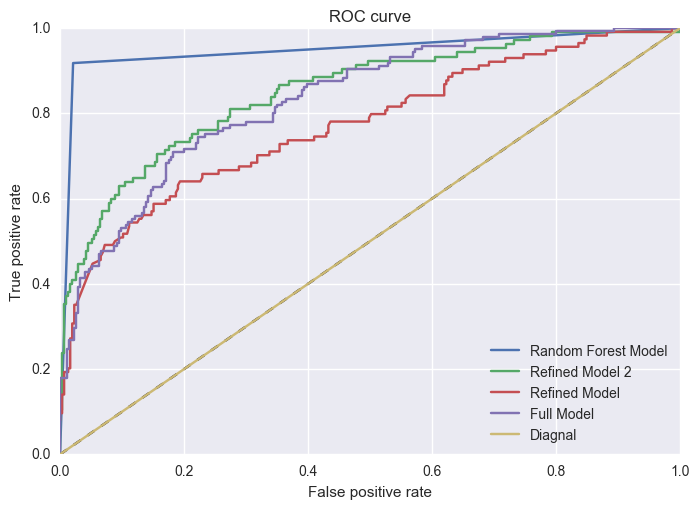

In [63]:
#Roc curve
actuals = y_test_df['chrun_flag_15_month']
probas = y_test_df['churn_pred']

fp_random_forest, tp_random_forest, _ = roc_curve(actuals, probas)
#Combine Multiple ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fp_random_forest, tp_random_forest, label='Random Forest Model')
plt.plot(fp_refine_model_2, tp_refine_model_2, label='Refined Model 2')
plt.plot(fp_refine_model, tp_refine_model, label='Refined Model')
plt.plot(fp_full_model, tp_full_model, label='Full Model')
plt.plot(fp_full_model, fp_full_model, label='Diagnal')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()